In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

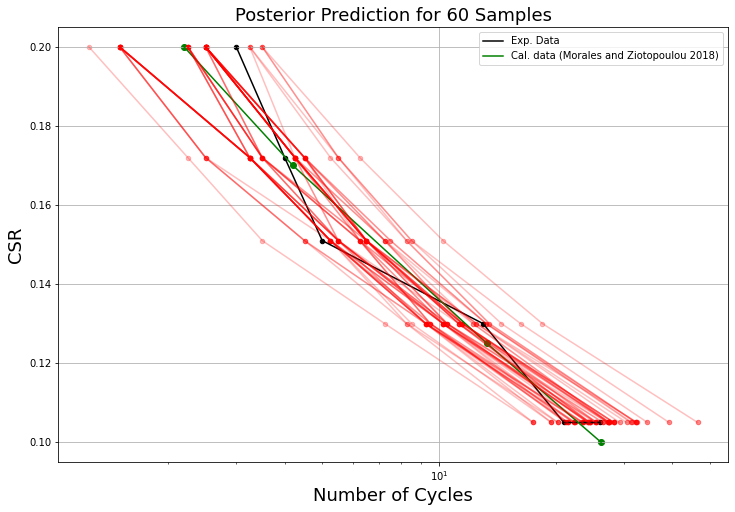

In [2]:
csrlist = np.genfromtxt('Ottawa_F65_ExpData.txt', usecols=(0))
expdata = np.genfromtxt('Ottawa_F65_ExpData.txt', usecols=(1))
#print(csrlist)
ncycles = ['nCycles_1.txt', 'nCycles_2.txt', 'nCycles_3.txt', 'nCycles_4.txt', 'nCycles_5.txt', 'nCycles_6.txt'];

simcycles = pd.read_csv(r'C:\Users\adith\Documents\Ottawa60Samples-BC\60Samples.csv', usecols = [5,6,7,8,9,10], skiprows = (0))
simcycles_t = simcycles.T #tranposing the dataframe
#print(simcycles_t)
# for x in csrlist:
#  ncyclesTotal[x] = np.genfromtxt(ncycles[x], 

csrlistdf = pd.DataFrame(csrlist, index = [' nCycles_1',' nCycles_2',' nCycles_3',' nCycles_4',' nCycles_5',' nCycles_6'], columns = ['csr'])
expdatadf = pd.DataFrame(expdata, index = [' nCycles_1',' nCycles_2',' nCycles_3',' nCycles_4',' nCycles_5',' nCycles_6'], columns = ['ExpData'])
#print(csrlistdf)
#print(expdatadf)


## Place the DataFrames side by side
# horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)
# csr = csrlistdf.loc[:, ['csr']];
# print(csr)
#combine = pd.concat([simcycles_t, csrlistdf, expdatadf['ExpData']], join = 'outer', axis = 1)
#combine = simcycles_t.append([csrlistdf], ignore_index=True,)

combine = pd.merge(simcycles_t, csrlistdf, left_index=True, right_index=True, how='outer')
combinetotal = pd.merge(combine, expdatadf, left_index=True, right_index=True, how='outer')
# print(combinetotal)
calx = np.array([26.2, 13.3, 4.2, 2.2]);
caly = np.array([0.1, 0.125, 0.17, 0.2]);

#plt.figure(figsize=(14, 4))
fig, ax = plt.subplots(1,1, figsize=(12, 8))

combinetotal.plot(x = 'ExpData', y = 'csr', kind = 'line', logx = True, ax = ax, legend = True , alpha = 1, c = 'black')
combinetotal.plot(x = 'ExpData', y = 'csr', kind = 'scatter', logx = True, ax = ax, alpha = 1, c = 'black')
plt.plot(calx, caly, c = 'green')
plt.scatter(calx, caly, c = 'green')
for z in range(len(simcycles)):
    combinetotal.plot(x = z, y = 'csr', kind = 'line', logx = True, ax = ax, legend = False, alpha = 0.25, c = 'red')
    combinetotal.plot(x = z, y = 'csr', kind = 'scatter', logx = True, ax = ax, legend = False, alpha = 0.25, c = 'red')
ax.legend(["Exp. Data", "Cal. data (Morales and Ziotopoulou 2018)"])
plt.grid(True)
plt.xlabel('Number of Cycles', fontsize = 18)
plt.ylabel('CSR', fontsize = 18)
plt.title('Posterior Prediction for 60 Samples', fontsize=18)
plt.savefig('60SamplesPostPrediction.png')

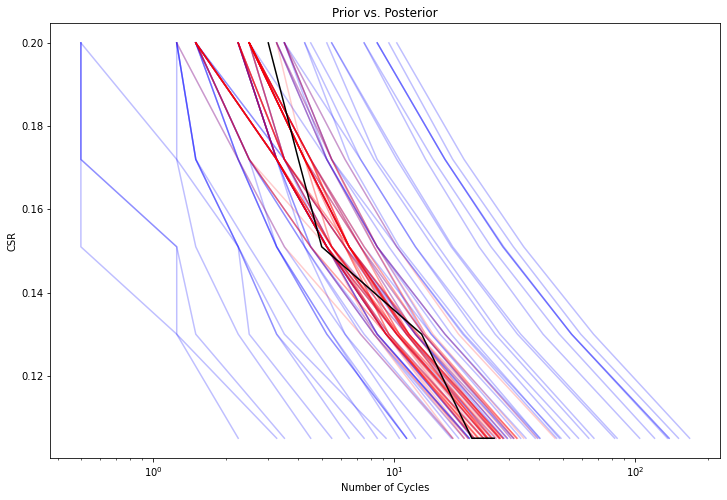

In [4]:
prior = np.genfromtxt(r"C:\Users\adith\Documents\Ottawa60Samples-BC\dakotaTabPrior.out", usecols = (6,7,8,9,10,11), skip_header = 1)
post = np.genfromtxt(r"C:\Users\adith\Documents\Ottawa60Samples-BC\dakotaTab.out", usecols = (6,7,8,9,10,11), skip_header = 1)
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.plot(prior.T, csrlist, c = 'blue', alpha = 0.25)
plt.xlabel('Number of Cycles')
plt.ylabel('CSR')
plt.title('Prior vs. Posterior')
plt.plot(post.T, csrlist, c = 'red', alpha = 0.20)
plt.plot(expdata, csrlist, c = 'black', alpha = 1)


           Dr          G0       hpo  nCycles.CovMultiplier
0    0.655344  367.106169  0.048415               0.724229
1    0.548915  223.334932  0.254672               2.105617
2    0.677601  316.417498  0.030377               1.007249
3    0.681221  247.960031  0.041943               1.487634
4    0.694903  210.250832  0.031170               1.395861
..        ...         ...       ...                    ...
115  0.510673  326.638916  0.300680               0.873963
116  0.614824  326.162857  0.271001               0.254980
117  0.529346  376.907361  0.113319               0.865932
118  0.617861  313.457428  0.035871               0.677151
119  0.639952  137.281289  0.154333               1.328096

[120 rows x 4 columns]


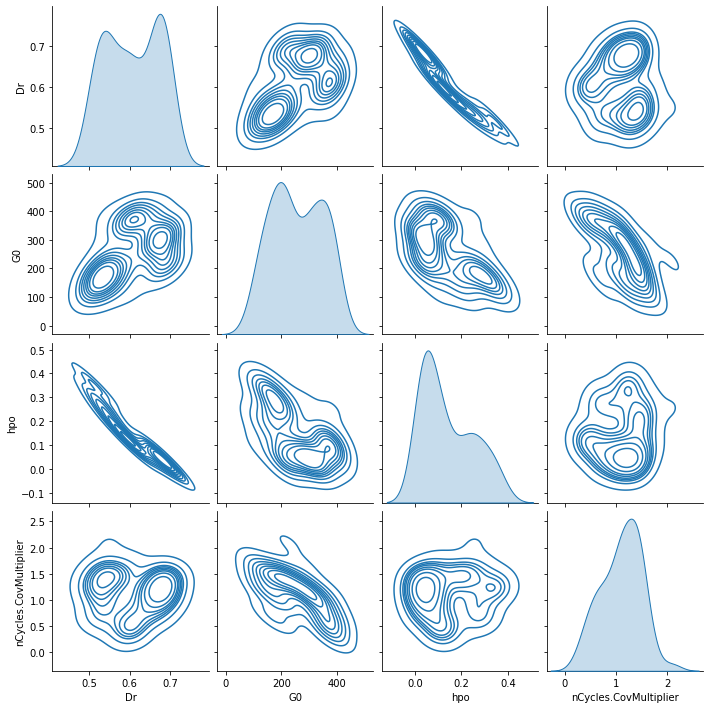

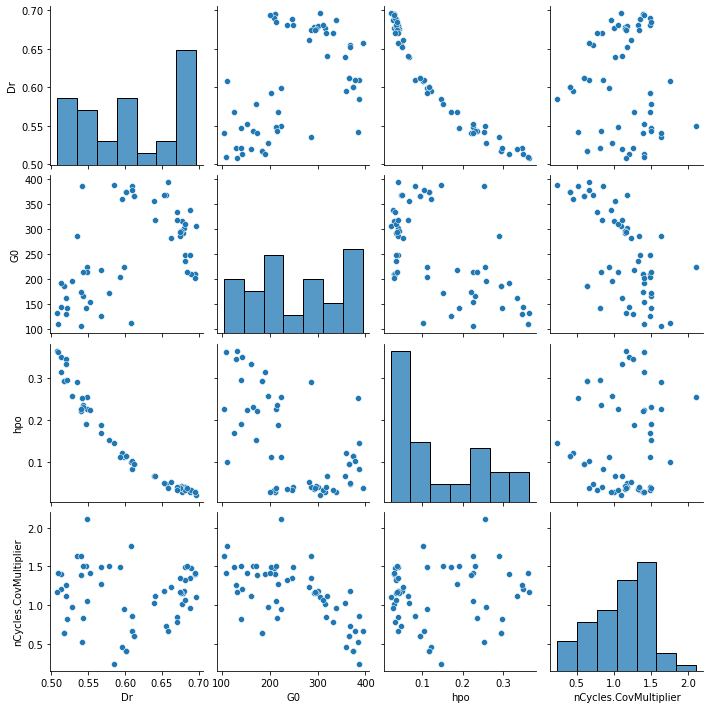

In [27]:
import pandas as pd

data1 = pd.read_csv(r"C:\Users\adith\Documents\Ottawa60Samples-BC\dakotaTab.out", delimiter = '\t', usecols = [2,3,4,5])
data2 = pd.read_csv(r"C:\Users\adith\Documents\Ottawa60Samples-BC\dakotaTabPrior.out", delimiter = '\t', usecols = [2,3,4,5])
# print(data1)
# print(data2)


#combine = pd.merge(data1, data2, left_index=True, right_index=True, how='outer')
combine = data1.append([data2], ignore_index=True)
print(combine)

sb.pairplot(data1, kind='kde')
plt.savefig('KDEplot60Samples.png')
sb.pairplot(data1)
plt.savefig('Pairplot60Samples.png')




In [9]:


def createCombinedPlots(expDataFile='Ottawa_F65_ExpData.txt', simDataFile='20Samples.csv', cols =5):

    # Read data
    # ---------
    # simDataFile = 'nCyclesResultD.dat'
    simData = np.loadtxt(simDataFile, dtype=float,delimiter=',',usecols=(6,7,8,9,10), skiprows = 0)
    # simData = np.loadtxt(simDataFile, dtype=float,usecols=(0, 1))

    # expDataFile = 'Dr67_100.txt'
    expData = np.loadtxt(expDataFile,usecols = (1))

    #Plot Results
    # -----------
    fig1 = plt.figure(num=1, figsize=(8, 6))
    plt.clf()
    
    axs = []
    axs.append(fig1.add_subplot(111))
    
    axs[0].clear()
    axs[0].semilogx(simData[:,1], simData[:,0], marker = 'o', markersize = 8,  markerfacecolor='w', markeredgewidth=1.5, markeredgecolor='black', color='black', linestyle='solid', linewidth=1.25, label = 'Simulation')
    axs[0].semilogx(expData[:,cols], expData[:,0], marker = 'o', markersize = 8,  markerfacecolor='k', markeredgewidth=1.5, markeredgecolor='black', color='black', linestyle='solid', linewidth=1.25, label = 'Experiment')
    axs[0].set_xlabel(r'# of cycles', fontsize=14)
    axs[0].set_ylabel(r'CSR', fontsize=14)
    # axs[0].set_xlim(5, 500)
    # axs[0].set_ylim(0.10, 0.17)
    axs[0].grid(color = 'blue', linestyle = '--', linewidth = 0.3)
    axs[0].legend()

    plt.savefig(r'PM4Sand_CSR-Ncycles.png')
    plt.show()


# if __name__ == "__main__":
#     createPlotsD()
    



In [10]:
createCombinedPlots();

IndexError: list index out of range